In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X,y = make_blobs(n_samples=500, centers = 5)
print X.shape,y.shape

(500, 2) (500,)


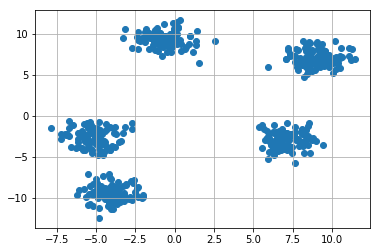

In [8]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0], X[:,1])
plt.show()

In [40]:
k = 5

colors = ['green','red','blue','yellow','orange','pink']

clusters = {}

for kx in range(k):
    centre = 10.0*(2*np.random.random((X.shape[1],)) -1)
    points = []
    cluster = {
        
        'centre' : centre,
        'points' : points,
        'color' : colors[kx]
    }
    clusters[kx] = cluster
    
print clusters

{0: {'color': 'green', 'points': [], 'centre': array([2.93472093, 9.61840242])}, 1: {'color': 'red', 'points': [], 'centre': array([-5.31735576, -1.53697269])}, 2: {'color': 'blue', 'points': [], 'centre': array([4.12708985, 7.42238615])}, 3: {'color': 'yellow', 'points': [], 'centre': array([-7.22545095, -7.69348365])}, 4: {'color': 'orange', 'points': [], 'centre': array([ 6.98337374, -6.87605895])}}


In [14]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

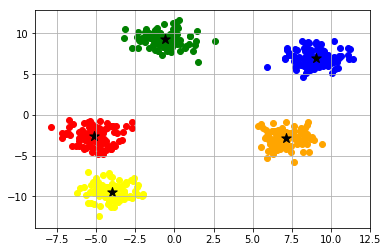

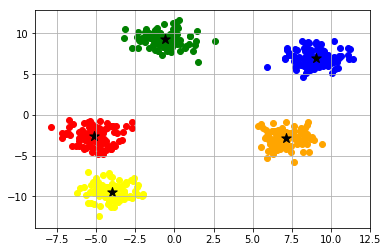

In [43]:
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d = distance(curr_x, clusters[kx]['centre'])
        dist.append(d)
    
    current_cluster = np.argmin(dist)
    
    clusters[current_cluster]['points'].append(curr_x)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts
    
plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")

for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['centre']
    
    clusters[kx]['centre'] = new_center
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")